<a href="https://colab.research.google.com/github/Trading-com-Dados/tutoriais_publicos/blob/main/20220406_SPREAD_ON_PREF_com_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **INDICADORES ANÁLISE TÉCNICA COM PYTHON** 
---

<img src="https://tradingcomdados.com/images/logotipo/logotipo-trading-com-dados.svg" width="300">


# **1. Bibliotecas utilizadas**

In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 41.8 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import yfinance as yf

# **2. Obter cotações ativos**

In [ ]:
ativos_spread = ['PETR4.SA','PETR3.SA']

In [ ]:
data_spread_PETR = yf.download(ativos_spread, 
                               start='2010-01-01', 
                               period = "1D")['Adj Close']
data_spread_PETR

[*********************100%***********************]  2 of 2 completed


,PETR3.SA,PETR4.SA
Date,,
2010-01-04,28.133713,23.643641
2010-01-05,27.964848,23.440918
2010-01-06,28.241789,23.757679
2010-01-07,28.072926,23.535942
2010-01-08,27.863518,23.409237
...,...,...
2022-03-31,35.240002,33.450001
2022-04-01,35.230000,33.009998
2022-04-04,34.869999,32.700001


In [ ]:
data_spread_PETR['Ratio_4_3'] = round((data_spread_PETR['PETR4.SA']/
                                       data_spread_PETR['PETR3.SA']),3)
data_spread_PETR

,PETR3.SA,PETR4.SA,Ratio_4_3
Date,,,
2010-01-04,28.133713,23.643641,0.840
2010-01-05,27.964848,23.440918,0.838
2010-01-06,28.241789,23.757679,0.841
2010-01-07,28.072926,23.535942,0.838
2010-01-08,27.863518,23.409237,0.840
...,...,...,...
2022-03-31,35.240002,33.450001,0.949
2022-04-01,35.230000,33.009998,0.937
2022-04-04,34.869999,32.700001,0.938


In [ ]:
data_spread_PETR.Ratio_4_3.describe()

count    3041.000000
mean        0.922496
std         0.076141
min         0.670000
25%         0.862000
50%         0.923000
75%         0.979000
max         1.100000
Name: Ratio_4_3, dtype: float64

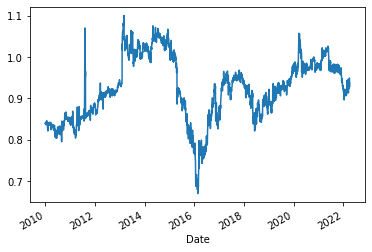

In [ ]:
data_spread_PETR.Ratio_4_3.plot();

In [ ]:
media_spread = round(np.mean(data_spread_PETR.Ratio_4_3),3)
sd1_min_spread = media_spread - round(np.std(data_spread_PETR.Ratio_4_3),3)
sd1_max_spread = media_spread + round(np.std(data_spread_PETR.Ratio_4_3),3)
sd2_min_spread = media_spread - (2* (round(np.std(data_spread_PETR.Ratio_4_3),3)))
sd2_max_spread = media_spread + (2* (round(np.std(data_spread_PETR.Ratio_4_3),3)))

In [ ]:
fig = px.line(data_spread_PETR, x=data_spread_PETR.index, y=data_spread_PETR.Ratio_4_3)

fig.add_hline(y=media_spread, line_width=5, line_color="green")
fig.add_hline(y=sd1_min_spread, line_width=3, line_dash="dash", line_color="orange")
fig.add_hline(y=sd1_max_spread, line_width=3, line_dash="dash", line_color="orange")
fig.add_hline(y=sd2_min_spread, line_width=5, line_dash="dash", line_color="red")
fig.add_hline(y=sd2_max_spread, line_width=5, line_dash="dash", line_color="red")

fig.update_layout(xaxis_rangeslider_visible=False, title_text='Razão entre preço PETR4 e PETR3 (2010 e mar/2022)',template = 'simple_white',width=500,height=500)
fig.show()